In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

##  Data from Data_Prep

In [2]:
credit_encoded = pd.read_csv("credit_encoded.csv")

## Function 

In [3]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def metrics(X_train,y_train,X_test,y_test,estimator):
    RMSE= [mean_squared_error(y_train,estimator.predict(X_train)),mean_squared_error(y_test,estimator.predict(X_test))]
    MAE= [mean_absolute_error(y_train,estimator.predict(X_train)),mean_absolute_error(y_test,estimator.predict(X_test))]
    R2= [r2_score(y_train,estimator.predict(X_train)),r2_score(y_test,estimator.predict(X_test))]
    df = pd.DataFrame({'R2':R2,'MAE': MAE,'RMSE':RMSE})
    df.index=['Train','Test']
    return(df)

## Split train test 

In [4]:
# Séparer la variable cible "montant" des autres variables
X = credit_encoded.drop('montant', axis=1)
y = credit_encoded['montant']

In [5]:
# Diviser le jeu de données en train et test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Définir le modèle 
model_1 = Sequential()
model_1.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu'))
model_1.add(Dense(1))

# Compiler le modèle
optimizer = Adam()
model_1.compile(optimizer=optimizer, loss=tf.keras.losses.mean_squared_error)

# Définir les hyperparamètres
batch_size = 20
epochs = 50
validation_split = 0.2

# Entraîner le modèle
history = model_1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, verbose=0)

2023-06-02 15:26:31.086338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 15:26:34.232302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Visu Model Summary avec ses paramètres
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                960       
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


In [9]:
metrics(X_train,y_train,X_test,y_test,model_1) 

10/10 [==============================] - 0s 595us/step


,R2,MAE,RMSE
Train,-0.952751,2925.695611,1.510295e+07
Test,-0.910429,2998.761790,1.665134e+07


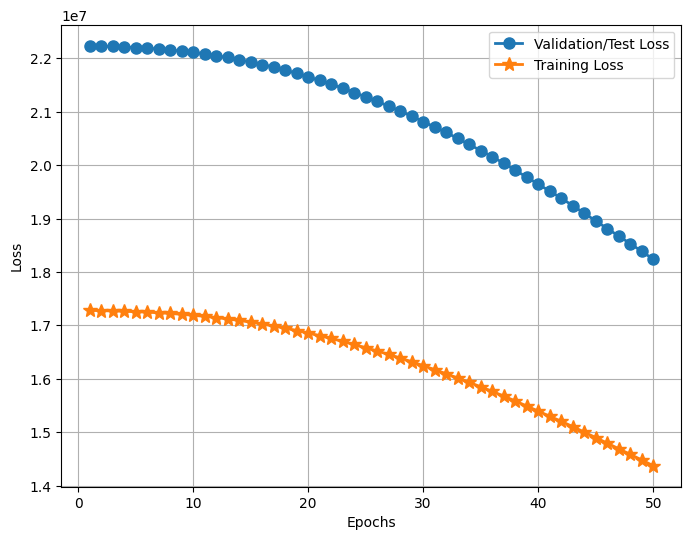

In [10]:
# Plot des loss 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Choix de l'architecture du réseau 

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
# Définir le modèle
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='linear', input_dim=X.shape[1]),
    keras.layers.Dense(64, activation='linear'),
    keras.layers.Dense(16, activation='linear'),
    keras.layers.Dense(1, activation='relu')
])

batch_size = 20
epochs = 50
validation_split = 0.2

# Compiler le modèle
model_2.compile(optimizer='adam', loss=tf.keras.losses.mean_squared_error)

# Entrainer le modèle
history_2=model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose = 0,validation_split=validation_split)

In [12]:
metrics(X_train,y_train,X_test,y_test,model_2)

10/10 [==============================] - 0s 611us/step


,R2,MAE,RMSE
Train,0.674214,1107.226419,2.519693e+06
Test,0.556854,1273.558310,3.862466e+06


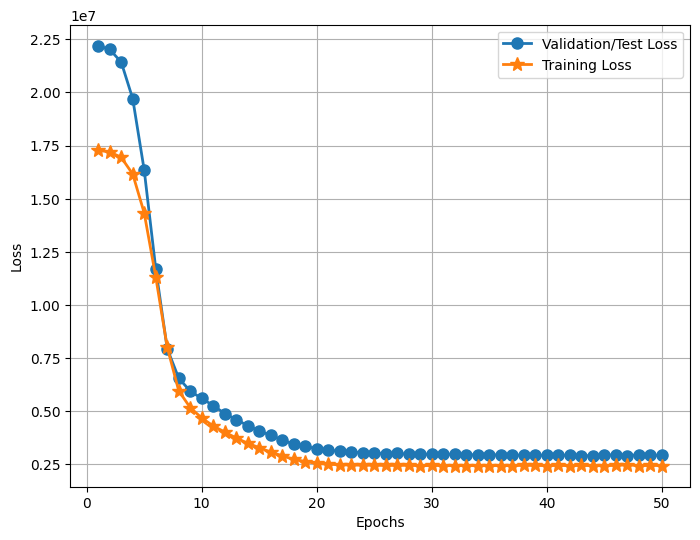

In [13]:
# Plot des loss 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
history_dict = history_2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = 'o', markersize=8.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Grid Search

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'linear', input_dim = 15))
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'mean_squared_error')
    #metrics = ['accuracy']
    return classifier

In [15]:
classifier = KerasClassifier(build_fn = build_classifier)

/var/folders/r2/p0mp1c1169x6d7b4d_lgqmgr0000gn/T/ipykernel_44133/3867060546.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


In [16]:
%time
# choix des hyperparamètres optimaux avec grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

parameters = {'batch_size': [16, 32, 64],
              'epochs': [10, 50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                          # scoring = 'r2',
                           scoring = make_scorer(mean_squared_error, greater_is_better=False),
                           cv = 5)
# entrainement 
grid_search = grid_search.fit(X_train, y_train)
# meilleurs résultats 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
Epoch 1/10
36/36 [==============================] - 0s 816us/step - loss: 91317.6953
Epoch 2/10
36/36 [==============================] - 0s 726us/step - loss: 91181.7109
Epoch 3/10
36/36 [==============================] - 0s 701us/step - loss: 91070.9375
Epoch 4/10
36/36 [==============================] - 0s 677us/step - loss: 91067.9531
Epoch 5/10
36/36 [==============================] - 0s 710us/step - loss: 91067.8438
Epoch 6/10
36/36 [==============================] - 0s 705us/step - loss: 91067.8047
Epoch 7/10
36/36 [==============================] - 0s 723us/step - loss: 91067.7734
Epoch 8/10
36/36 [==============================] - 0s 783us/step - loss: 91067.7500
Epoch 9/10
36/36 [==============================] - 0s 752us/step - loss: 91067.7266
Epoch 10/10
5/5 [==============================] - 0s 818us/step
Epoch 1/10
36/36 [==============================] - 0s 792us/step - loss: 92494.6406
Epoch 2/10
36/36 [===

5/5 [==============================] - 0s 855us/step
Epoch 1/10
36/36 [==============================] - 0s 770us/step - loss: 93347.6172
Epoch 2/10
36/36 [==============================] - 0s 709us/step - loss: 93180.1953
Epoch 3/10
36/36 [==============================] - 0s 666us/step - loss: 93139.3672
Epoch 4/10
36/36 [==============================] - 0s 644us/step - loss: 93137.7891
Epoch 5/10
36/36 [==============================] - 0s 641us/step - loss: 93137.6797
Epoch 6/10
36/36 [==============================] - 0s 637us/step - loss: 93137.6797
Epoch 7/10
36/36 [==============================] - 0s 639us/step - loss: 93137.6562
Epoch 8/10
36/36 [==============================] - 0s 642us/step - loss: 93137.6641
Epoch 9/10
36/36 [==============================] - 0s 641us/step - loss: 93137.6484
Epoch 10/10
5/5 [==============================] - 0s 762us/step
Epoch 1/50
36/36 [==============================] - 0s 856us/step - loss: 91315.3438
Epoch 2/50
36/36 [==============

36/36 [==============================] - 0s 729us/step - loss: 92245.2344
Epoch 35/50
36/36 [==============================] - 0s 731us/step - loss: 92245.2422
Epoch 36/50
36/36 [==============================] - 0s 723us/step - loss: 92245.2344
Epoch 37/50
36/36 [==============================] - 0s 697us/step - loss: 92245.2344
Epoch 38/50
36/36 [==============================] - 0s 690us/step - loss: 92245.2500
Epoch 39/50
36/36 [==============================] - 0s 691us/step - loss: 92245.2266
Epoch 40/50
36/36 [==============================] - 0s 684us/step - loss: 92245.2344
Epoch 41/50
36/36 [==============================] - 0s 683us/step - loss: 92245.2188
Epoch 42/50
36/36 [==============================] - 0s 689us/step - loss: 92245.2344
Epoch 43/50
36/36 [==============================] - 0s 680us/step - loss: 92245.2344
Epoch 44/50
36/36 [==============================] - 0s 688us/step - loss: 92245.2266
Epoch 45/50
36/36 [==============================] - 0s 687us/step

36/36 [==============================] - 0s 771us/step - loss: 94353.7500
Epoch 29/50
36/36 [==============================] - 0s 742us/step - loss: 94353.7656
Epoch 30/50
36/36 [==============================] - 0s 714us/step - loss: 94353.7578
Epoch 31/50
36/36 [==============================] - 0s 697us/step - loss: 94353.7500
Epoch 32/50
36/36 [==============================] - 0s 699us/step - loss: 94353.7656
Epoch 33/50
36/36 [==============================] - 0s 702us/step - loss: 94353.7500
Epoch 34/50
36/36 [==============================] - 0s 693us/step - loss: 94353.7734
Epoch 35/50
36/36 [==============================] - 0s 692us/step - loss: 94353.7500
Epoch 36/50
36/36 [==============================] - 0s 687us/step - loss: 94353.7656
Epoch 37/50
36/36 [==============================] - 0s 687us/step - loss: 94353.7500
Epoch 38/50
36/36 [==============================] - 0s 681us/step - loss: 94353.7734
Epoch 39/50
36/36 [==============================] - 0s 705us/step

36/36 [==============================] - 0s 680us/step - loss: 91067.6719
Epoch 23/50
36/36 [==============================] - 0s 656us/step - loss: 91067.6641
Epoch 24/50
36/36 [==============================] - 0s 678us/step - loss: 91067.6641
Epoch 25/50
36/36 [==============================] - 0s 647us/step - loss: 91067.6719
Epoch 26/50
36/36 [==============================] - 0s 724us/step - loss: 91067.6562
Epoch 27/50
36/36 [==============================] - 0s 674us/step - loss: 91067.6719
Epoch 28/50
36/36 [==============================] - 0s 683us/step - loss: 91067.6641
Epoch 29/50
36/36 [==============================] - 0s 675us/step - loss: 91067.6719
Epoch 30/50
36/36 [==============================] - 0s 658us/step - loss: 91067.6641
Epoch 31/50
36/36 [==============================] - 0s 669us/step - loss: 91067.6641
Epoch 32/50
36/36 [==============================] - 0s 680us/step - loss: 91067.6719
Epoch 33/50
36/36 [==============================] - 0s 679us/step

36/36 [==============================] - 0s 664us/step - loss: 91366.0078
Epoch 17/50
36/36 [==============================] - 0s 649us/step - loss: 91366.0156
Epoch 18/50
36/36 [==============================] - 0s 651us/step - loss: 91366.0000
Epoch 19/50
36/36 [==============================] - 0s 646us/step - loss: 91366.0000
Epoch 20/50
36/36 [==============================] - 0s 638us/step - loss: 91366.0156
Epoch 21/50
36/36 [==============================] - 0s 641us/step - loss: 91366.0078
Epoch 22/50
36/36 [==============================] - 0s 633us/step - loss: 91366.0000
Epoch 23/50
36/36 [==============================] - 0s 641us/step - loss: 91366.0078
Epoch 24/50
36/36 [==============================] - 0s 635us/step - loss: 91366.0078
Epoch 25/50
36/36 [==============================] - 0s 639us/step - loss: 91366.0000
Epoch 26/50
36/36 [==============================] - 0s 638us/step - loss: 91366.0000
Epoch 27/50
36/36 [==============================] - 0s 644us/step

36/36 [==============================] - 0s 675us/step - loss: 93137.6562
Epoch 11/50
36/36 [==============================] - 0s 669us/step - loss: 93137.6719
Epoch 12/50
36/36 [==============================] - 0s 648us/step - loss: 93137.6797
Epoch 13/50
36/36 [==============================] - 0s 642us/step - loss: 93137.6641
Epoch 14/50
36/36 [==============================] - 0s 629us/step - loss: 93137.6719
Epoch 15/50
36/36 [==============================] - 0s 631us/step - loss: 93137.6641
Epoch 16/50
36/36 [==============================] - 0s 634us/step - loss: 93137.6562
Epoch 17/50
36/36 [==============================] - 0s 627us/step - loss: 93137.6719
Epoch 18/50
36/36 [==============================] - 0s 629us/step - loss: 93137.6562
Epoch 19/50
36/36 [==============================] - 0s 631us/step - loss: 93137.6641
Epoch 20/50
36/36 [==============================] - 0s 638us/step - loss: 93137.6797
Epoch 21/50
36/36 [==============================] - 0s 635us/step

36/36 [==============================] - 0s 718us/step - loss: 91067.6641
Epoch 55/100
36/36 [==============================] - 0s 731us/step - loss: 91067.6641
Epoch 56/100
36/36 [==============================] - 0s 711us/step - loss: 91067.6719
Epoch 57/100
36/36 [==============================] - 0s 689us/step - loss: 91067.6641
Epoch 58/100
36/36 [==============================] - 0s 694us/step - loss: 91067.6641
Epoch 59/100
36/36 [==============================] - 0s 689us/step - loss: 91067.6719
Epoch 60/100
36/36 [==============================] - 0s 681us/step - loss: 91067.6484
Epoch 61/100
36/36 [==============================] - 0s 692us/step - loss: 91067.6641
Epoch 62/100
36/36 [==============================] - 0s 686us/step - loss: 91067.6562
Epoch 63/100
36/36 [==============================] - 0s 691us/step - loss: 91067.6719
Epoch 64/100
36/36 [==============================] - 0s 686us/step - loss: 91067.6719
Epoch 65/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 688us/step - loss: 92245.2188
Epoch 48/100
36/36 [==============================] - 0s 688us/step - loss: 92245.2266
Epoch 49/100
36/36 [==============================] - 0s 691us/step - loss: 92245.2188
Epoch 50/100
36/36 [==============================] - 0s 688us/step - loss: 92245.2188
Epoch 51/100
36/36 [==============================] - 0s 693us/step - loss: 92245.2266
Epoch 52/100
36/36 [==============================] - 0s 694us/step - loss: 92245.2266
Epoch 53/100
36/36 [==============================] - 0s 695us/step - loss: 92245.2344
Epoch 54/100
36/36 [==============================] - 0s 688us/step - loss: 92245.2344
Epoch 55/100
36/36 [==============================] - 0s 689us/step - loss: 92245.2344
Epoch 56/100
36/36 [==============================] - 0s 685us/step - loss: 92245.2266
Epoch 57/100
36/36 [==============================] - 0s 691us/step - loss: 92245.2266
Epoch 58/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 685us/step - loss: 91366.0078
Epoch 41/100
36/36 [==============================] - 0s 688us/step - loss: 91366.0078
Epoch 42/100
36/36 [==============================] - 0s 688us/step - loss: 91366.0078
Epoch 43/100
36/36 [==============================] - 0s 692us/step - loss: 91366.0000
Epoch 44/100
36/36 [==============================] - 0s 693us/step - loss: 91366.0000
Epoch 45/100
36/36 [==============================] - 0s 686us/step - loss: 91366.0234
Epoch 46/100
36/36 [==============================] - 0s 684us/step - loss: 91366.0000
Epoch 47/100
36/36 [==============================] - 0s 690us/step - loss: 91366.0000
Epoch 48/100
36/36 [==============================] - 0s 686us/step - loss: 91366.0000
Epoch 49/100
36/36 [==============================] - 0s 685us/step - loss: 91366.0078
Epoch 50/100
36/36 [==============================] - 0s 688us/step - loss: 91365.9922
Epoch 51/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 689us/step - loss: 94353.7734
Epoch 34/100
36/36 [==============================] - 0s 688us/step - loss: 94353.7422
Epoch 35/100
36/36 [==============================] - 0s 692us/step - loss: 94353.7500
Epoch 36/100
36/36 [==============================] - 0s 675us/step - loss: 94353.7500
Epoch 37/100
36/36 [==============================] - 0s 687us/step - loss: 94353.7578
Epoch 38/100
36/36 [==============================] - 0s 690us/step - loss: 94353.7656
Epoch 39/100
36/36 [==============================] - 0s 683us/step - loss: 94353.7500
Epoch 40/100
36/36 [==============================] - 0s 685us/step - loss: 94353.7578
Epoch 41/100
36/36 [==============================] - 0s 687us/step - loss: 94353.7656
Epoch 42/100
36/36 [==============================] - 0s 686us/step - loss: 94353.7578
Epoch 43/100
36/36 [==============================] - 0s 681us/step - loss: 94353.7578
Epoch 44/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 705us/step - loss: 93137.6875
Epoch 27/100
36/36 [==============================] - 0s 682us/step - loss: 93137.6797
Epoch 28/100
36/36 [==============================] - 0s 691us/step - loss: 93137.6797
Epoch 29/100
36/36 [==============================] - 0s 682us/step - loss: 93137.6719
Epoch 30/100
36/36 [==============================] - 0s 668us/step - loss: 93137.6797
Epoch 31/100
36/36 [==============================] - 0s 688us/step - loss: 93137.6484
Epoch 32/100
36/36 [==============================] - 0s 696us/step - loss: 93137.6641
Epoch 33/100
36/36 [==============================] - 0s 700us/step - loss: 93137.6797
Epoch 34/100
36/36 [==============================] - 0s 688us/step - loss: 93137.6484
Epoch 35/100
36/36 [==============================] - 0s 700us/step - loss: 93137.6719
Epoch 36/100
36/36 [==============================] - 0s 700us/step - loss: 93137.6797
Epoch 37/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 644us/step - loss: 91067.6797
Epoch 20/100
36/36 [==============================] - 0s 640us/step - loss: 91067.6719
Epoch 21/100
36/36 [==============================] - 0s 641us/step - loss: 91067.6641
Epoch 22/100
36/36 [==============================] - 0s 640us/step - loss: 91067.6719
Epoch 23/100
36/36 [==============================] - 0s 645us/step - loss: 91067.6562
Epoch 24/100
36/36 [==============================] - 0s 640us/step - loss: 91067.6562
Epoch 25/100
36/36 [==============================] - 0s 642us/step - loss: 91067.6719
Epoch 26/100
36/36 [==============================] - 0s 641us/step - loss: 91067.6641
Epoch 27/100
36/36 [==============================] - 0s 642us/step - loss: 91067.6641
Epoch 28/100
36/36 [==============================] - 0s 639us/step - loss: 91067.6719
Epoch 29/100
36/36 [==============================] - 0s 637us/step - loss: 91067.6719
Epoch 30/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 649us/step - loss: 92245.2109
Epoch 13/100
36/36 [==============================] - 0s 642us/step - loss: 92245.2266
Epoch 14/100
36/36 [==============================] - 0s 641us/step - loss: 92245.2422
Epoch 15/100
36/36 [==============================] - 0s 638us/step - loss: 92245.2266
Epoch 16/100
36/36 [==============================] - 0s 648us/step - loss: 92245.2344
Epoch 17/100
36/36 [==============================] - 0s 644us/step - loss: 92245.2500
Epoch 18/100
36/36 [==============================] - 0s 641us/step - loss: 92245.2266
Epoch 19/100
36/36 [==============================] - 0s 641us/step - loss: 92245.2266
Epoch 20/100
36/36 [==============================] - 0s 644us/step - loss: 92245.2344
Epoch 21/100
36/36 [==============================] - 0s 641us/step - loss: 92245.2188
Epoch 22/100
36/36 [==============================] - 0s 640us/step - loss: 92245.2422
Epoch 23/100
36/36 [==============================] - 0s

36/36 [==============================] - 0s 643us/step - loss: 91366.0000
Epoch 6/100
36/36 [==============================] - 0s 647us/step - loss: 91366.0078
Epoch 7/100
36/36 [==============================] - 0s 646us/step - loss: 91366.0156
Epoch 8/100
36/36 [==============================] - 0s 644us/step - loss: 91366.0156
Epoch 9/100
36/36 [==============================] - 0s 644us/step - loss: 91366.0000
Epoch 10/100
36/36 [==============================] - 0s 645us/step - loss: 91366.0078
Epoch 11/100
36/36 [==============================] - 0s 641us/step - loss: 91366.0000
Epoch 12/100
36/36 [==============================] - 0s 641us/step - loss: 91366.0234
Epoch 13/100
36/36 [==============================] - 0s 640us/step - loss: 91366.0000
Epoch 14/100
36/36 [==============================] - 0s 643us/step - loss: 91366.0078
Epoch 15/100
36/36 [==============================] - 0s 642us/step - loss: 91366.0234
Epoch 16/100
36/36 [==============================] - 0s 644

36/36 [==============================] - 0s 635us/step - loss: 91366.0078
Epoch 100/100
5/5 [==============================] - 0s 746us/step
Epoch 1/100
36/36 [==============================] - 0s 786us/step - loss: 94560.8203
Epoch 2/100
36/36 [==============================] - 0s 724us/step - loss: 94400.9062
Epoch 3/100
36/36 [==============================] - 0s 674us/step - loss: 94355.5391
Epoch 4/100
36/36 [==============================] - 0s 653us/step - loss: 94353.8906
Epoch 5/100
36/36 [==============================] - 0s 644us/step - loss: 94353.7734
Epoch 6/100
36/36 [==============================] - 0s 642us/step - loss: 94353.7656
Epoch 7/100
36/36 [==============================] - 0s 640us/step - loss: 94353.7500
Epoch 8/100
36/36 [==============================] - 0s 642us/step - loss: 94353.7500
Epoch 9/100
36/36 [==============================] - 0s 642us/step - loss: 94353.7734
Epoch 10/100
36/36 [==============================] - 0s 645us/step - loss: 94353.765

36/36 [==============================] - 0s 644us/step - loss: 94353.7500
Epoch 93/100
36/36 [==============================] - 0s 643us/step - loss: 94353.7422
Epoch 94/100
36/36 [==============================] - 0s 649us/step - loss: 94353.7500
Epoch 95/100
36/36 [==============================] - 0s 647us/step - loss: 94353.7578
Epoch 96/100
36/36 [==============================] - 0s 637us/step - loss: 94353.7578
Epoch 97/100
36/36 [==============================] - 0s 641us/step - loss: 94353.7500
Epoch 98/100
36/36 [==============================] - 0s 639us/step - loss: 94353.7578
Epoch 99/100
36/36 [==============================] - 0s 639us/step - loss: 94353.7656
Epoch 100/100
5/5 [==============================] - 0s 750us/step
Epoch 1/100
36/36 [==============================] - 0s 774us/step - loss: 93353.3672
Epoch 2/100
36/36 [==============================] - 0s 727us/step - loss: 93185.6094
Epoch 3/100
36/36 [==============================] - 0s 672us/step - loss: 931

36/36 [==============================] - 0s 643us/step - loss: 93137.6797
Epoch 86/100
36/36 [==============================] - 0s 638us/step - loss: 93137.6484
Epoch 87/100
36/36 [==============================] - 0s 639us/step - loss: 93137.6797
Epoch 88/100
36/36 [==============================] - 0s 639us/step - loss: 93137.6641
Epoch 89/100
36/36 [==============================] - 0s 638us/step - loss: 93137.6719
Epoch 90/100
36/36 [==============================] - 0s 636us/step - loss: 93137.6562
Epoch 91/100
36/36 [==============================] - 0s 641us/step - loss: 93137.6562
Epoch 92/100
36/36 [==============================] - 0s 634us/step - loss: 93137.6797
Epoch 93/100
36/36 [==============================] - 0s 638us/step - loss: 93137.6719
Epoch 94/100
36/36 [==============================] - 0s 638us/step - loss: 93137.6719
Epoch 95/100
36/36 [==============================] - 0s 642us/step - loss: 93137.6797
Epoch 96/100
36/36 [==============================] - 0s

18/18 [==============================] - 0s 696us/step - loss: 91366.5234
Epoch 7/10
18/18 [==============================] - 0s 695us/step - loss: 91366.1641
Epoch 8/10
18/18 [==============================] - 0s 711us/step - loss: 91366.0625
Epoch 9/10
18/18 [==============================] - 0s 707us/step - loss: 91366.0234
Epoch 10/10
5/5 [==============================] - 0s 738us/step
Epoch 1/10
18/18 [==============================] - 0s 853us/step - loss: 94600.5391
Epoch 2/10
18/18 [==============================] - 0s 781us/step - loss: 94510.8516
Epoch 3/10
18/18 [==============================] - 0s 765us/step - loss: 94422.5078
Epoch 4/10
18/18 [==============================] - 0s 741us/step - loss: 94367.1094
Epoch 5/10
18/18 [==============================] - 0s 734us/step - loss: 94356.1172
Epoch 6/10
18/18 [==============================] - 0s 687us/step - loss: 94354.3438
Epoch 7/10
18/18 [==============================] - 0s 705us/step - loss: 94353.9297
Epoch 8/10


18/18 [==============================] - 0s 800us/step - loss: 92245.2812
Epoch 20/50
18/18 [==============================] - 0s 802us/step - loss: 92245.2734
Epoch 21/50
18/18 [==============================] - 0s 782us/step - loss: 92245.2734
Epoch 22/50
18/18 [==============================] - 0s 788us/step - loss: 92245.2734
Epoch 23/50
18/18 [==============================] - 0s 784us/step - loss: 92245.2578
Epoch 24/50
18/18 [==============================] - 0s 791us/step - loss: 92245.2656
Epoch 25/50
18/18 [==============================] - 0s 792us/step - loss: 92245.2656
Epoch 26/50
18/18 [==============================] - 0s 780us/step - loss: 92245.2578
Epoch 27/50
18/18 [==============================] - 0s 769us/step - loss: 92245.2734
Epoch 28/50
18/18 [==============================] - 0s 770us/step - loss: 92245.2578
Epoch 29/50
18/18 [==============================] - 0s 757us/step - loss: 92245.2578
Epoch 30/50
18/18 [==============================] - 0s 745us/step

18/18 [==============================] - 0s 807us/step - loss: 94353.8438
Epoch 14/50
18/18 [==============================] - 0s 796us/step - loss: 94353.8516
Epoch 15/50
18/18 [==============================] - 0s 790us/step - loss: 94353.8359
Epoch 16/50
18/18 [==============================] - 0s 801us/step - loss: 94353.8203
Epoch 17/50
18/18 [==============================] - 0s 764us/step - loss: 94353.8125
Epoch 18/50
18/18 [==============================] - 0s 747us/step - loss: 94353.8125
Epoch 19/50
18/18 [==============================] - 0s 759us/step - loss: 94353.8047
Epoch 20/50
18/18 [==============================] - 0s 739us/step - loss: 94353.7969
Epoch 21/50
18/18 [==============================] - 0s 728us/step - loss: 94353.7891
Epoch 22/50
18/18 [==============================] - 0s 739us/step - loss: 94353.7969
Epoch 23/50
18/18 [==============================] - 0s 764us/step - loss: 94353.7891
Epoch 24/50
18/18 [==============================] - 0s 732us/step

18/18 [==============================] - 0s 764us/step - loss: 91067.8281
Epoch 8/50
18/18 [==============================] - 0s 754us/step - loss: 91067.7109
Epoch 9/50
18/18 [==============================] - 0s 740us/step - loss: 91067.6797
Epoch 10/50
18/18 [==============================] - 0s 761us/step - loss: 91067.6641
Epoch 11/50
18/18 [==============================] - 0s 713us/step - loss: 91067.6641
Epoch 12/50
18/18 [==============================] - 0s 697us/step - loss: 91067.6562
Epoch 13/50
18/18 [==============================] - 0s 712us/step - loss: 91067.6719
Epoch 14/50
18/18 [==============================] - 0s 1ms/step - loss: 91067.6719
Epoch 15/50
18/18 [==============================] - 0s 724us/step - loss: 91067.6641
Epoch 16/50
18/18 [==============================] - 0s 726us/step - loss: 91067.6641
Epoch 17/50
18/18 [==============================] - 0s 744us/step - loss: 91067.6719
Epoch 18/50
18/18 [==============================] - 0s 741us/step - l

18/18 [==============================] - 0s 834us/step - loss: 91610.5625
Epoch 2/50
18/18 [==============================] - 0s 797us/step - loss: 91520.0234
Epoch 3/50
18/18 [==============================] - 0s 764us/step - loss: 91431.5469
Epoch 4/50
18/18 [==============================] - 0s 777us/step - loss: 91378.3828
Epoch 5/50
18/18 [==============================] - 0s 731us/step - loss: 91368.1484
Epoch 6/50
18/18 [==============================] - 0s 697us/step - loss: 91366.5547
Epoch 7/50
18/18 [==============================] - 0s 683us/step - loss: 91366.1641
Epoch 8/50
18/18 [==============================] - 0s 712us/step - loss: 91366.0547
Epoch 9/50
18/18 [==============================] - 0s 728us/step - loss: 91366.0312
Epoch 10/50
18/18 [==============================] - 0s 746us/step - loss: 91366.0078
Epoch 11/50
18/18 [==============================] - 0s 700us/step - loss: 91366.0000
Epoch 12/50
18/18 [==============================] - 0s 694us/step - loss:

18/18 [==============================] - 0s 752us/step - loss: 94353.7656
Epoch 47/50
18/18 [==============================] - 0s 738us/step - loss: 94353.7656
Epoch 48/50
18/18 [==============================] - 0s 699us/step - loss: 94353.7578
Epoch 49/50
18/18 [==============================] - 0s 727us/step - loss: 94353.7500
Epoch 50/50
5/5 [==============================] - 0s 775us/step
Epoch 1/50
18/18 [==============================] - 0s 830us/step - loss: 93385.1719
Epoch 2/50
18/18 [==============================] - 0s 777us/step - loss: 93294.0781
Epoch 3/50
18/18 [==============================] - 0s 765us/step - loss: 93199.1016
Epoch 4/50
18/18 [==============================] - 0s 726us/step - loss: 93149.6328
Epoch 5/50
18/18 [==============================] - 0s 734us/step - loss: 93139.8750
Epoch 6/50
18/18 [==============================] - 0s 702us/step - loss: 93138.2109
Epoch 7/50
18/18 [==============================] - 0s 697us/step - loss: 93137.8359
Epoch 8/

Epoch 40/100
18/18 [==============================] - 0s 781us/step - loss: 91067.6797
Epoch 41/100
18/18 [==============================] - 0s 784us/step - loss: 91067.6797
Epoch 42/100
18/18 [==============================] - 0s 777us/step - loss: 91067.6719
Epoch 43/100
18/18 [==============================] - 0s 776us/step - loss: 91067.6719
Epoch 44/100
18/18 [==============================] - 0s 761us/step - loss: 91067.6719
Epoch 45/100
18/18 [==============================] - 0s 768us/step - loss: 91067.6797
Epoch 46/100
18/18 [==============================] - 0s 774us/step - loss: 91067.6797
Epoch 47/100
18/18 [==============================] - 0s 770us/step - loss: 91067.6719
Epoch 48/100
18/18 [==============================] - 0s 754us/step - loss: 91067.6562
Epoch 49/100
18/18 [==============================] - 0s 755us/step - loss: 91067.6719
Epoch 50/100
18/18 [==============================] - 0s 775us/step - loss: 91067.6719
Epoch 51/100
18/18 [=======================

18/18 [==============================] - 0s 784us/step - loss: 92245.2578
Epoch 34/100
18/18 [==============================] - 0s 775us/step - loss: 92245.2656
Epoch 35/100
18/18 [==============================] - 0s 761us/step - loss: 92245.2500
Epoch 36/100
18/18 [==============================] - 0s 790us/step - loss: 92245.2500
Epoch 37/100
18/18 [==============================] - 0s 755us/step - loss: 92245.2422
Epoch 38/100
18/18 [==============================] - 0s 768us/step - loss: 92245.2578
Epoch 39/100
18/18 [==============================] - 0s 767us/step - loss: 92245.2422
Epoch 40/100
18/18 [==============================] - 0s 769us/step - loss: 92245.2500
Epoch 41/100
18/18 [==============================] - 0s 764us/step - loss: 92245.2500
Epoch 42/100
18/18 [==============================] - 0s 780us/step - loss: 92245.2578
Epoch 43/100
18/18 [==============================] - 0s 787us/step - loss: 92245.2422
Epoch 44/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 776us/step - loss: 91366.0469
Epoch 27/100
18/18 [==============================] - 0s 787us/step - loss: 91366.0391
Epoch 28/100
18/18 [==============================] - 0s 796us/step - loss: 91366.0156
Epoch 29/100
18/18 [==============================] - 0s 768us/step - loss: 91366.0312
Epoch 30/100
18/18 [==============================] - 0s 757us/step - loss: 91366.0312
Epoch 31/100
18/18 [==============================] - 0s 751us/step - loss: 91366.0234
Epoch 32/100
18/18 [==============================] - 0s 772us/step - loss: 91366.0234
Epoch 33/100
18/18 [==============================] - 0s 752us/step - loss: 91366.0312
Epoch 34/100
18/18 [==============================] - 0s 757us/step - loss: 91366.0156
Epoch 35/100
18/18 [==============================] - 0s 744us/step - loss: 91366.0156
Epoch 36/100
18/18 [==============================] - 0s 742us/step - loss: 91366.0234
Epoch 37/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 782us/step - loss: 94353.8125
Epoch 20/100
18/18 [==============================] - 0s 767us/step - loss: 94353.8047
Epoch 21/100
18/18 [==============================] - 0s 794us/step - loss: 94353.8047
Epoch 22/100
18/18 [==============================] - 0s 773us/step - loss: 94353.7891
Epoch 23/100
18/18 [==============================] - 0s 763us/step - loss: 94353.7891
Epoch 24/100
18/18 [==============================] - 0s 788us/step - loss: 94353.7812
Epoch 25/100
18/18 [==============================] - 0s 797us/step - loss: 94353.7891
Epoch 26/100
18/18 [==============================] - 0s 770us/step - loss: 94353.7812
Epoch 27/100
18/18 [==============================] - 0s 762us/step - loss: 94353.7812
Epoch 28/100
18/18 [==============================] - 0s 761us/step - loss: 94353.7812
Epoch 29/100
18/18 [==============================] - 0s 762us/step - loss: 94353.7734
Epoch 30/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 801us/step - loss: 93137.7656
Epoch 13/100
18/18 [==============================] - 0s 774us/step - loss: 93137.7656
Epoch 14/100
18/18 [==============================] - 0s 794us/step - loss: 93137.7500
Epoch 15/100
18/18 [==============================] - 0s 772us/step - loss: 93137.7422
Epoch 16/100
18/18 [==============================] - 0s 777us/step - loss: 93137.7266
Epoch 17/100
18/18 [==============================] - 0s 778us/step - loss: 93137.7266
Epoch 18/100
18/18 [==============================] - 0s 770us/step - loss: 93137.7188
Epoch 19/100
18/18 [==============================] - 0s 774us/step - loss: 93137.7109
Epoch 20/100
18/18 [==============================] - 0s 780us/step - loss: 93137.7031
Epoch 21/100
18/18 [==============================] - 0s 766us/step - loss: 93137.7031
Epoch 22/100
18/18 [==============================] - 0s 787us/step - loss: 93137.7031
Epoch 23/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 807us/step - loss: 91069.7734
Epoch 6/100
18/18 [==============================] - 0s 766us/step - loss: 91068.1875
Epoch 7/100
18/18 [==============================] - 0s 743us/step - loss: 91067.8203
Epoch 8/100
18/18 [==============================] - 0s 745us/step - loss: 91067.7109
Epoch 9/100
18/18 [==============================] - 0s 736us/step - loss: 91067.6797
Epoch 10/100
18/18 [==============================] - 0s 745us/step - loss: 91067.6641
Epoch 11/100
18/18 [==============================] - 0s 735us/step - loss: 91067.6641
Epoch 12/100
18/18 [==============================] - 0s 712us/step - loss: 91067.6719
Epoch 13/100
18/18 [==============================] - 0s 699us/step - loss: 91067.6719
Epoch 14/100
18/18 [==============================] - 0s 712us/step - loss: 91067.6641
Epoch 15/100
18/18 [==============================] - 0s 713us/step - loss: 91067.6719
Epoch 16/100
18/18 [==============================] - 0s 724

18/18 [==============================] - 0s 749us/step - loss: 91067.6719
Epoch 100/100
5/5 [==============================] - 0s 812us/step
Epoch 1/100
18/18 [==============================] - 0s 850us/step - loss: 92493.5312
Epoch 2/100
18/18 [==============================] - 0s 765us/step - loss: 92404.1953
Epoch 3/100
18/18 [==============================] - 0s 767us/step - loss: 92308.3594
Epoch 4/100
18/18 [==============================] - 0s 742us/step - loss: 92256.4844
Epoch 5/100
18/18 [==============================] - 0s 748us/step - loss: 92247.2812
Epoch 6/100
18/18 [==============================] - 0s 696us/step - loss: 92245.7734
Epoch 7/100
18/18 [==============================] - 0s 682us/step - loss: 92245.3906
Epoch 8/100
18/18 [==============================] - 0s 699us/step - loss: 92245.2734
Epoch 9/100
18/18 [==============================] - 0s 685us/step - loss: 92245.2500
Epoch 10/100
18/18 [==============================] - 0s 693us/step - loss: 92245.234

18/18 [==============================] - 0s 753us/step - loss: 92245.2344
Epoch 93/100
18/18 [==============================] - 0s 728us/step - loss: 92245.2188
Epoch 94/100
18/18 [==============================] - 0s 722us/step - loss: 92245.2188
Epoch 95/100
18/18 [==============================] - 0s 726us/step - loss: 92245.2266
Epoch 96/100
18/18 [==============================] - 0s 719us/step - loss: 92245.2344
Epoch 97/100
18/18 [==============================] - 0s 710us/step - loss: 92245.2344
Epoch 98/100
18/18 [==============================] - 0s 679us/step - loss: 92245.2344
Epoch 99/100
18/18 [==============================] - 0s 697us/step - loss: 92245.2266
Epoch 100/100
5/5 [==============================] - 0s 768us/step
Epoch 1/100
18/18 [==============================] - 0s 834us/step - loss: 91605.0469
Epoch 2/100
18/18 [==============================] - 0s 781us/step - loss: 91510.7266
Epoch 3/100
18/18 [==============================] - 0s 763us/step - loss: 914

18/18 [==============================] - 0s 741us/step - loss: 91366.0078
Epoch 86/100
18/18 [==============================] - 0s 786us/step - loss: 91366.0078
Epoch 87/100
18/18 [==============================] - 0s 743us/step - loss: 91366.0078
Epoch 88/100
18/18 [==============================] - 0s 741us/step - loss: 91366.0078
Epoch 89/100
18/18 [==============================] - 0s 733us/step - loss: 91366.0156
Epoch 90/100
18/18 [==============================] - 0s 721us/step - loss: 91366.0156
Epoch 91/100
18/18 [==============================] - 0s 726us/step - loss: 91366.0078
Epoch 92/100
18/18 [==============================] - 0s 703us/step - loss: 91366.0078
Epoch 93/100
18/18 [==============================] - 0s 713us/step - loss: 91366.0078
Epoch 94/100
18/18 [==============================] - 0s 686us/step - loss: 91366.0000
Epoch 95/100
18/18 [==============================] - 0s 703us/step - loss: 91366.0156
Epoch 96/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 756us/step - loss: 94353.7578
Epoch 79/100
18/18 [==============================] - 0s 739us/step - loss: 94353.7656
Epoch 80/100
18/18 [==============================] - 0s 755us/step - loss: 94353.7500
Epoch 81/100
18/18 [==============================] - 0s 710us/step - loss: 94353.7656
Epoch 82/100
18/18 [==============================] - 0s 750us/step - loss: 94353.7656
Epoch 83/100
18/18 [==============================] - 0s 711us/step - loss: 94353.7656
Epoch 84/100
18/18 [==============================] - 0s 724us/step - loss: 94353.7500
Epoch 85/100
18/18 [==============================] - 0s 726us/step - loss: 94353.7578
Epoch 86/100
18/18 [==============================] - 0s 752us/step - loss: 94353.7656
Epoch 87/100
18/18 [==============================] - 0s 726us/step - loss: 94353.7578
Epoch 88/100
18/18 [==============================] - 0s 704us/step - loss: 94353.7500
Epoch 89/100
18/18 [==============================] - 0s

18/18 [==============================] - 0s 730us/step - loss: 93137.6719
Epoch 72/100
18/18 [==============================] - 0s 743us/step - loss: 93137.6719
Epoch 73/100
18/18 [==============================] - 0s 758us/step - loss: 93137.6641
Epoch 74/100
18/18 [==============================] - 0s 738us/step - loss: 93137.6797
Epoch 75/100
18/18 [==============================] - 0s 761us/step - loss: 93137.6641
Epoch 76/100
18/18 [==============================] - 0s 742us/step - loss: 93137.6641
Epoch 77/100
18/18 [==============================] - 0s 761us/step - loss: 93137.6719
Epoch 78/100
18/18 [==============================] - 0s 728us/step - loss: 93137.6641
Epoch 79/100
18/18 [==============================] - 0s 721us/step - loss: 93137.6719
Epoch 80/100
18/18 [==============================] - 0s 709us/step - loss: 93137.6641
Epoch 81/100
18/18 [==============================] - 0s 698us/step - loss: 93137.6719
Epoch 82/100
18/18 [==============================] - 0s

Epoch 4/10
9/9 [==============================] - 0s 960us/step - loss: 92369.7500
Epoch 5/10
9/9 [==============================] - 0s 928us/step - loss: 92318.5938
Epoch 6/10
9/9 [==============================] - 0s 906us/step - loss: 92276.8125
Epoch 7/10
9/9 [==============================] - 0s 868us/step - loss: 92257.0000
Epoch 8/10
9/9 [==============================] - 0s 906us/step - loss: 92250.0000
Epoch 9/10
9/9 [==============================] - 0s 933us/step - loss: 92247.4141
Epoch 10/10
5/5 [==============================] - 0s 806us/step
Epoch 1/10
9/9 [==============================] - 0s 940us/step - loss: 91621.5625
Epoch 2/10
9/9 [==============================] - 0s 898us/step - loss: 91590.1094
Epoch 3/10
9/9 [==============================] - 0s 837us/step - loss: 91534.2422
Epoch 4/10
9/9 [==============================] - 0s 870us/step - loss: 91490.5156
Epoch 5/10
9/9 [==============================] - 0s 835us/step - loss: 91449.2812
Epoch 6/10
9/9 [======

Epoch 9/50
9/9 [==============================] - 0s 940us/step - loss: 92251.0156
Epoch 10/50
9/9 [==============================] - 0s 988us/step - loss: 92246.5078
Epoch 11/50
9/9 [==============================] - 0s 908us/step - loss: 92245.7578
Epoch 12/50
9/9 [==============================] - 0s 910us/step - loss: 92245.5547
Epoch 13/50
9/9 [==============================] - 0s 911us/step - loss: 92245.4844
Epoch 14/50
9/9 [==============================] - 0s 922us/step - loss: 92245.4453
Epoch 15/50
9/9 [==============================] - 0s 915us/step - loss: 92245.4219
Epoch 16/50
9/9 [==============================] - 0s 899us/step - loss: 92245.4062
Epoch 17/50
9/9 [==============================] - 0s 916us/step - loss: 92245.3750
Epoch 18/50
9/9 [==============================] - 0s 877us/step - loss: 92245.3750
Epoch 19/50
9/9 [==============================] - 0s 963us/step - loss: 92245.3594
Epoch 20/50
9/9 [==============================] - 0s 891us/step - loss: 9224

9/9 [==============================] - 0s 911us/step - loss: 94519.3750
Epoch 6/50
9/9 [==============================] - 0s 921us/step - loss: 94477.4062
Epoch 7/50
9/9 [==============================] - 0s 903us/step - loss: 94433.3594
Epoch 8/50
9/9 [==============================] - 0s 928us/step - loss: 94386.4219
Epoch 9/50
9/9 [==============================] - 0s 962us/step - loss: 94362.1016
Epoch 10/50
9/9 [==============================] - 0s 899us/step - loss: 94355.8438
Epoch 11/50
9/9 [==============================] - 0s 951us/step - loss: 94354.4922
Epoch 12/50
9/9 [==============================] - 0s 868us/step - loss: 94354.1562
Epoch 13/50
9/9 [==============================] - 0s 871us/step - loss: 94354.0312
Epoch 14/50
9/9 [==============================] - 0s 876us/step - loss: 94353.9922
Epoch 15/50
9/9 [==============================] - 0s 844us/step - loss: 94353.9609
Epoch 16/50
9/9 [==============================] - 0s 846us/step - loss: 94353.9297
Epoch 17

9/9 [==============================] - 0s 954us/step - loss: 91322.3203
Epoch 2/50
9/9 [==============================] - 0s 906us/step - loss: 91287.6016
Epoch 3/50
9/9 [==============================] - 0s 855us/step - loss: 91234.7656
Epoch 4/50
9/9 [==============================] - 0s 871us/step - loss: 91189.7500
Epoch 5/50
9/9 [==============================] - 0s 825us/step - loss: 91141.5859
Epoch 6/50
9/9 [==============================] - 0s 822us/step - loss: 91100.4375
Epoch 7/50
9/9 [==============================] - 0s 818us/step - loss: 91079.7891
Epoch 8/50
9/9 [==============================] - 0s 821us/step - loss: 91072.5469
Epoch 9/50
9/9 [==============================] - 0s 847us/step - loss: 91069.8516
Epoch 10/50
9/9 [==============================] - 0s 821us/step - loss: 91068.7422
Epoch 11/50
9/9 [==============================] - 0s 780us/step - loss: 91068.2188
Epoch 12/50
9/9 [==============================] - 0s 786us/step - loss: 91067.9609
Epoch 13/50


9/9 [==============================] - 0s 902us/step - loss: 92245.2266
Epoch 49/50
9/9 [==============================] - 0s 829us/step - loss: 92245.2188
Epoch 50/50
5/5 [==============================] - 0s 777us/step
Epoch 1/50
9/9 [==============================] - 0s 992us/step - loss: 91621.0156
Epoch 2/50
9/9 [==============================] - 0s 877us/step - loss: 91586.4375
Epoch 3/50
9/9 [==============================] - 0s 870us/step - loss: 91529.4453
Epoch 4/50
9/9 [==============================] - 0s 888us/step - loss: 91484.9219
Epoch 5/50
9/9 [==============================] - 0s 836us/step - loss: 91440.8594
Epoch 6/50
9/9 [==============================] - 0s 839us/step - loss: 91400.9141
Epoch 7/50
9/9 [==============================] - 0s 813us/step - loss: 91379.0859
Epoch 8/50
9/9 [==============================] - 0s 855us/step - loss: 91371.0625
Epoch 9/50
9/9 [==============================] - 0s 828us/step - loss: 91368.2578
Epoch 10/50
9/9 [===============

9/9 [==============================] - 0s 932us/step - loss: 94353.7500
Epoch 45/50
9/9 [==============================] - 0s 854us/step - loss: 94353.7500
Epoch 46/50
9/9 [==============================] - 0s 863us/step - loss: 94353.7500
Epoch 47/50
9/9 [==============================] - 0s 786us/step - loss: 94353.7500
Epoch 48/50
9/9 [==============================] - 0s 861us/step - loss: 94353.7500
Epoch 49/50
9/9 [==============================] - 0s 849us/step - loss: 94353.7656
Epoch 50/50
5/5 [==============================] - 0s 821us/step
Epoch 1/50
9/9 [==============================] - 0s 964us/step - loss: 93396.2578
Epoch 2/50
9/9 [==============================] - 0s 894us/step - loss: 93367.7500
Epoch 3/50
9/9 [==============================] - 0s 911us/step - loss: 93311.7500
Epoch 4/50
9/9 [==============================] - 0s 893us/step - loss: 93261.5312
Epoch 5/50
9/9 [==============================] - 0s 863us/step - loss: 93214.1562
Epoch 6/50
9/9 [============

9/9 [==============================] - 0s 858us/step - loss: 91067.7109
Epoch 41/100
9/9 [==============================] - 0s 902us/step - loss: 91067.6953
Epoch 42/100
9/9 [==============================] - 0s 937us/step - loss: 91067.7031
Epoch 43/100
9/9 [==============================] - 0s 849us/step - loss: 91067.6953
Epoch 44/100
9/9 [==============================] - 0s 913us/step - loss: 91067.6953
Epoch 45/100
9/9 [==============================] - 0s 875us/step - loss: 91067.6953
Epoch 46/100
9/9 [==============================] - 0s 862us/step - loss: 91067.6875
Epoch 47/100
9/9 [==============================] - 0s 886us/step - loss: 91067.7031
Epoch 48/100
9/9 [==============================] - 0s 919us/step - loss: 91067.6875
Epoch 49/100
9/9 [==============================] - 0s 930us/step - loss: 91067.6953
Epoch 50/100
9/9 [==============================] - 0s 882us/step - loss: 91067.6953
Epoch 51/100
9/9 [==============================] - 0s 895us/step - loss: 9106

9/9 [==============================] - 0s 884us/step - loss: 92245.2734
Epoch 37/100
9/9 [==============================] - 0s 885us/step - loss: 92245.2734
Epoch 38/100
9/9 [==============================] - 0s 897us/step - loss: 92245.2734
Epoch 39/100
9/9 [==============================] - 0s 878us/step - loss: 92245.2734
Epoch 40/100
9/9 [==============================] - 0s 875us/step - loss: 92245.2734
Epoch 41/100
9/9 [==============================] - 0s 879us/step - loss: 92245.2656
Epoch 42/100
9/9 [==============================] - 0s 911us/step - loss: 92245.2656
Epoch 43/100
9/9 [==============================] - 0s 904us/step - loss: 92245.2656
Epoch 44/100
9/9 [==============================] - 0s 897us/step - loss: 92245.2578
Epoch 45/100
9/9 [==============================] - 0s 1ms/step - loss: 92245.2578
Epoch 46/100
9/9 [==============================] - 0s 900us/step - loss: 92245.2578
Epoch 47/100
9/9 [==============================] - 0s 879us/step - loss: 92245.

9/9 [==============================] - 0s 940us/step - loss: 91366.0703
Epoch 33/100
9/9 [==============================] - 0s 902us/step - loss: 91366.0625
Epoch 34/100
9/9 [==============================] - 0s 953us/step - loss: 91366.0625
Epoch 35/100
9/9 [==============================] - 0s 971us/step - loss: 91366.0703
Epoch 36/100
9/9 [==============================] - 0s 896us/step - loss: 91366.0547
Epoch 37/100
9/9 [==============================] - 0s 918us/step - loss: 91366.0547
Epoch 38/100
9/9 [==============================] - 0s 895us/step - loss: 91366.0469
Epoch 39/100
9/9 [==============================] - 0s 893us/step - loss: 91366.0469
Epoch 40/100
9/9 [==============================] - 0s 900us/step - loss: 91366.0547
Epoch 41/100
9/9 [==============================] - 0s 878us/step - loss: 91366.0547
Epoch 42/100
9/9 [==============================] - 0s 910us/step - loss: 91366.0469
Epoch 43/100
9/9 [==============================] - 0s 905us/step - loss: 9136

9/9 [==============================] - 0s 876us/step - loss: 94353.8281
Epoch 29/100
9/9 [==============================] - 0s 892us/step - loss: 94353.8203
Epoch 30/100
9/9 [==============================] - 0s 906us/step - loss: 94353.8203
Epoch 31/100
9/9 [==============================] - 0s 890us/step - loss: 94353.8281
Epoch 32/100
9/9 [==============================] - 0s 874us/step - loss: 94353.8203
Epoch 33/100
9/9 [==============================] - 0s 850us/step - loss: 94353.8125
Epoch 34/100
9/9 [==============================] - 0s 889us/step - loss: 94353.8047
Epoch 35/100
9/9 [==============================] - 0s 898us/step - loss: 94353.8047
Epoch 36/100
9/9 [==============================] - 0s 858us/step - loss: 94353.8047
Epoch 37/100
9/9 [==============================] - 0s 921us/step - loss: 94353.7969
Epoch 38/100
9/9 [==============================] - 0s 876us/step - loss: 94353.7969
Epoch 39/100
9/9 [==============================] - 0s 891us/step - loss: 9435

9/9 [==============================] - 0s 871us/step - loss: 93137.7578
Epoch 25/100
9/9 [==============================] - 0s 918us/step - loss: 93137.7500
Epoch 26/100
9/9 [==============================] - 0s 878us/step - loss: 93137.7500
Epoch 27/100
9/9 [==============================] - 0s 882us/step - loss: 93137.7500
Epoch 28/100
9/9 [==============================] - 0s 900us/step - loss: 93137.7500
Epoch 29/100
9/9 [==============================] - 0s 860us/step - loss: 93137.7500
Epoch 30/100
9/9 [==============================] - 0s 930us/step - loss: 93137.7344
Epoch 31/100
9/9 [==============================] - 0s 854us/step - loss: 93137.7266
Epoch 32/100
9/9 [==============================] - 0s 903us/step - loss: 93137.7266
Epoch 33/100
9/9 [==============================] - 0s 894us/step - loss: 93137.7266
Epoch 34/100
9/9 [==============================] - 0s 874us/step - loss: 93137.7188
Epoch 35/100
9/9 [==============================] - 0s 842us/step - loss: 9313

9/9 [==============================] - 0s 839us/step - loss: 91067.6719
Epoch 21/100
9/9 [==============================] - 0s 881us/step - loss: 91067.6641
Epoch 22/100
9/9 [==============================] - 0s 818us/step - loss: 91067.6719
Epoch 23/100
9/9 [==============================] - 0s 857us/step - loss: 91067.6719
Epoch 24/100
9/9 [==============================] - 0s 805us/step - loss: 91067.6562
Epoch 25/100
9/9 [==============================] - 0s 875us/step - loss: 91067.6719
Epoch 26/100
9/9 [==============================] - 0s 811us/step - loss: 91067.6719
Epoch 27/100
9/9 [==============================] - 0s 919us/step - loss: 91067.6719
Epoch 28/100
9/9 [==============================] - 0s 819us/step - loss: 91067.6641
Epoch 29/100
9/9 [==============================] - 0s 863us/step - loss: 91067.6719
Epoch 30/100
9/9 [==============================] - 0s 825us/step - loss: 91067.6719
Epoch 31/100
9/9 [==============================] - 0s 849us/step - loss: 9106

9/9 [==============================] - 0s 882us/step - loss: 92245.2656
Epoch 17/100
9/9 [==============================] - 0s 1ms/step - loss: 92245.2422
Epoch 18/100
9/9 [==============================] - 0s 906us/step - loss: 92245.2344
Epoch 19/100
9/9 [==============================] - 0s 877us/step - loss: 92245.2266
Epoch 20/100
9/9 [==============================] - 0s 850us/step - loss: 92245.2344
Epoch 21/100
9/9 [==============================] - 0s 799us/step - loss: 92245.2344
Epoch 22/100
9/9 [==============================] - 0s 884us/step - loss: 92245.2266
Epoch 23/100
9/9 [==============================] - 0s 844us/step - loss: 92245.2266
Epoch 24/100
9/9 [==============================] - 0s 901us/step - loss: 92245.2344
Epoch 25/100
9/9 [==============================] - 0s 810us/step - loss: 92245.2266
Epoch 26/100
9/9 [==============================] - 0s 871us/step - loss: 92245.2344
Epoch 27/100
9/9 [==============================] - 0s 831us/step - loss: 92245.

9/9 [==============================] - 0s 817us/step - loss: 91366.3047
Epoch 13/100
9/9 [==============================] - 0s 890us/step - loss: 91366.1719
Epoch 14/100
9/9 [==============================] - 0s 836us/step - loss: 91366.1016
Epoch 15/100
9/9 [==============================] - 0s 836us/step - loss: 91366.0703
Epoch 16/100
9/9 [==============================] - 0s 835us/step - loss: 91366.0469
Epoch 17/100
9/9 [==============================] - 0s 829us/step - loss: 91366.0156
Epoch 18/100
9/9 [==============================] - 0s 793us/step - loss: 91366.0078
Epoch 19/100
9/9 [==============================] - 0s 801us/step - loss: 91366.0078
Epoch 20/100
9/9 [==============================] - 0s 883us/step - loss: 91366.0078
Epoch 21/100
9/9 [==============================] - 0s 820us/step - loss: 91366.0156
Epoch 22/100
9/9 [==============================] - 0s 854us/step - loss: 91366.0078
Epoch 23/100
9/9 [==============================] - 0s 822us/step - loss: 9136

Epoch 8/100
9/9 [==============================] - 0s 899us/step - loss: 94360.2578
Epoch 9/100
9/9 [==============================] - 0s 930us/step - loss: 94356.5000
Epoch 10/100
9/9 [==============================] - 0s 855us/step - loss: 94355.0391
Epoch 11/100
9/9 [==============================] - 0s 878us/step - loss: 94354.4062
Epoch 12/100
9/9 [==============================] - 0s 793us/step - loss: 94354.1016
Epoch 13/100
9/9 [==============================] - 0s 847us/step - loss: 94353.9375
Epoch 14/100
9/9 [==============================] - 0s 801us/step - loss: 94353.8516
Epoch 15/100
9/9 [==============================] - 0s 826us/step - loss: 94353.8125
Epoch 16/100
9/9 [==============================] - 0s 789us/step - loss: 94353.7812
Epoch 17/100
9/9 [==============================] - 0s 837us/step - loss: 94353.7812
Epoch 18/100
9/9 [==============================] - 0s 797us/step - loss: 94353.7656
Epoch 19/100
9/9 [==============================] - 0s 841us/step -

9/9 [==============================] - 0s 883us/step - loss: 93313.3750
Epoch 4/100
9/9 [==============================] - 0s 901us/step - loss: 93261.3047
Epoch 5/100
9/9 [==============================] - 0s 867us/step - loss: 93213.0312
Epoch 6/100
9/9 [==============================] - 0s 911us/step - loss: 93172.7578
Epoch 7/100
9/9 [==============================] - 0s 853us/step - loss: 93151.5938
Epoch 8/100
9/9 [==============================] - 0s 889us/step - loss: 93143.2891
Epoch 9/100
9/9 [==============================] - 0s 811us/step - loss: 93140.1719
Epoch 10/100
9/9 [==============================] - 0s 883us/step - loss: 93138.8750
Epoch 11/100
9/9 [==============================] - 0s 823us/step - loss: 93138.2812
Epoch 12/100
9/9 [==============================] - 0s 813us/step - loss: 93138.0000
Epoch 13/100
9/9 [==============================] - 0s 814us/step - loss: 93137.8359
Epoch 14/100
9/9 [==============================] - 0s 799us/step - loss: 93137.7734

9/9 [==============================] - 0s 872us/step - loss: 93137.6641
Epoch 100/100
5/5 [==============================] - 0s 798us/step
Epoch 1/10
45/45 [==============================] - 0s 807us/step - loss: 140786.5781
Epoch 2/10
45/45 [==============================] - 0s 726us/step - loss: 140557.1094
Epoch 3/10
45/45 [==============================] - 0s 685us/step - loss: 140492.8125
Epoch 4/10
45/45 [==============================] - 0s 684us/step - loss: 140492.3906
Epoch 5/10
45/45 [==============================] - 0s 689us/step - loss: 140492.3125
Epoch 6/10
45/45 [==============================] - 0s 684us/step - loss: 140492.2656
Epoch 7/10
45/45 [==============================] - 0s 686us/step - loss: 140492.2031
Epoch 8/10
45/45 [==============================] - 0s 687us/step - loss: 140492.2188
Epoch 9/10
45/45 [==============================] - 0s 679us/step - loss: 140492.2031
Epoch 10/10
45/45 [==============================] - 0s 682us/step - loss: 140492.1875


In [17]:
best_parameters

{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}

In [18]:
# on fit le modèle avec les meilleurs hyperparamètres 
history_3=model_2.fit(X_train, y_train, epochs=10, batch_size=16,verbose = 0,validation_split=validation_split)

In [19]:
metrics(X_train,y_train,X_test,y_test,model_2)

10/10 [==============================] - 0s 578us/step


,R2,MAE,RMSE
Train,0.673951,1121.161028,2.521723e+06
Test,0.563093,1277.473228,3.808093e+06
